In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import re
from nltk.corpus import stopwords
import string
import re

stop_words = stopwords.words('english')
punctuations = list(string.punctuation)
stop_words.extend(punctuations)

data = pd.read_csv("train.tsv", sep="\t")

data.reset_index(inplace = True)

data.drop('index', axis = 1, inplace = True)

valdata = pd.read_csv("valid.tsv", sep="\t")

valdata.reset_index(inplace = True)

valdata.drop('index', axis = 1, inplace = True)



def removestopwords(txt):
  ans = []
  txt = txt[0]
  txt = re.sub(r'\([^]]*\)', ' ', txt) # removing parenthesis
  txt = re.sub(r'\[[^]]*\]', ' ', txt) # removing third brackets
  txt = re.sub(r'([\.\\\+\*\?\[\^\]\$\(\)\{\}\!\<\>\|\:\-\,\"\”\“\‘])', ' ', txt)
 # print(txt[0].split())
  for i in txt.split():
    if (i.lower().strip()) not in stop_words:
      ans.append((i.lower().strip()))
  #print(ans)
  ans.append(" ")
  return " ".join(ans)

#this word
data = data.dropna()

valdata = valdata.dropna()


data["position"] = data["position"].to_frame(0).apply(removestopwords, axis = 1)
data["text"] = data["text"].to_frame(0).apply(removestopwords, axis = 1)
data["state"] = data["state"].to_frame(0).apply(removestopwords, axis = 1)
data["person"] = data["person"].to_frame(0).apply(removestopwords, axis = 1)
data["context"] = data["context"].to_frame(0).apply(removestopwords, axis = 1)
data["topic"] = data["topic"].to_frame(0).apply(removestopwords, axis = 1)


valdata["position"] = valdata["position"].to_frame(0).apply(removestopwords, axis = 1)
valdata["text"] = valdata["text"].to_frame(0).apply(removestopwords, axis = 1)
valdata["person"] = valdata["person"].to_frame(0).apply(removestopwords, axis = 1)
valdata["state"] = valdata["state"].to_frame(0).apply(removestopwords, axis = 1)
valdata["context"] = valdata["context"].to_frame(0).apply(removestopwords, axis = 1)
valdata["topic"] = valdata["topic"].to_frame(0).apply(removestopwords, axis = 1)




In [4]:
data["text"] = data["topic"] + data["person"] + data["position"] + data["state"] + data["party"] + data["text"]

valdata["text"] = valdata["topic"] + valdata["person"] + valdata["position"] + valdata["state"] + valdata["party"] + valdata["text"]

#I combined training and validation here, I split them up later
#using train_test_split function
data = pd.concat([valdata, data])
convertdict = {"pants-fire": 0, "false": 0, "barely-true": 0, "half-true": 1, "mostly-true": 1, "true":1}

def convert(txt):
  return convertdict[txt[0]]

data["valid"] = data["valid"].to_frame(0).apply(convert, axis = 1)

data

,file,valid,text,topic,person,position,state,party,a,b,c,d,e,context
1,7891.json,0,campaign finance congress taxes earl blumenau...,campaign finance congress taxes,earl blumenauer,u representative,oregon,democrat,0.0,1.0,1.0,1.0,0.0,u ways means hearing
2,8169.json,1,poverty jim francesconi member state board h...,poverty,jim francesconi,member state board higher education,oregon,none,0.0,1.0,1.0,1.0,0.0,opinion article
3,929.json,1,economy stimulus barack obama president ill...,economy stimulus,barack obama,president,illinois,democrat,70.0,71.0,160.0,163.0,9.0,interview cbs news
4,9416.json,0,guns jim rubens small business owner new ha...,guns,jim rubens,small business owner,new hampshire,republican,1.0,1.0,0.0,1.0,0.0,interview gun shop hudson n h
5,6861.json,1,education state budget andy berke lawyer sta...,education state budget,andy berke,lawyer state senator,tennessee,democrat,0.0,0.0,0.0,0.0,0.0,letter state senate education committee chairw...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4440,10405.json,0,energy job accomplishments bobby scott u con...,energy job accomplishments,bobby scott,u congressman,virginia,democrat,1.0,2.0,1.0,5.0,0.0,news release
4441,5479.json,0,health care message machine 2012 voting record...,health care message machine 2012 voting record,marcy kaptur,representative ohio's ninth congressional dist...,ohio,democrat,0.0,2.0,4.0,4.0,0.0,campaign commercial
4442,13021.json,0,candidates biography taxes transparency donal...,candidates biography taxes transparency,donald trump,president elect,new york,republican,63.0,114.0,51.0,37.0,61.0,interview abc news
4444,7777.json,0,foreign policy terrorism jay carney white ho...,foreign policy terrorism,jay carney,white house press secretary,district columbia,none,2.0,2.0,1.0,2.0,0.0,white house press briefing


In [5]:
data = data.drop(columns=["file", "topic", "person", "position", "state", "party", "a", "b", "c", "d", "e", "context"])


In [6]:
data

,valid,text
1,0,campaign finance congress taxes earl blumenau...
2,1,poverty jim francesconi member state board h...
3,1,economy stimulus barack obama president ill...
4,0,guns jim rubens small business owner new ha...
5,1,education state budget andy berke lawyer sta...
...,...,...
4440,0,energy job accomplishments bobby scott u con...
4441,0,health care message machine 2012 voting record...
4442,0,candidates biography taxes transparency donal...
4444,0,foreign policy terrorism jay carney white ho...


In [7]:
from transformers import BertTokenizer, TFBertModel
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = TFBertModel.from_pretrained("bert-base-uncased")

text1 = "Replace me by any text you'd like."
text2 = "Remove the text"

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


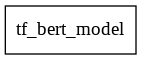

In [8]:
from keras.utils.vis_utils import plot_model

plot_model(model) 


In [9]:

encoded_input1 = tokenizer.encode(text1, max_length=20, pad_to_max_length=True, return_tensors='tf')
encoded_input2 = tokenizer.encode(text2, max_length=20, pad_to_max_length=True, return_tensors='tf')



Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [10]:
print(encoded_input1.shape)
print(encoded_input2.shape)

(1, 20)
(1, 20)


In [11]:
print([encoded_input1, encoded_input2])

[<tf.Tensor: shape=(1, 20), dtype=int32, numpy=
array([[ 101, 5672, 2033, 2011, 2151, 3793, 2017, 1005, 1040, 2066, 1012,
         102,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)>, <tf.Tensor: shape=(1, 20), dtype=int32, numpy=
array([[ 101, 6366, 1996, 3793,  102,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0]],
      dtype=int32)>]


In [12]:
output = model([encoded_input1, encoded_input2])


In [13]:
text = data.text.values
text.shape

(3805,)

In [14]:
input_ids = [tokenizer.encode(i,
                              max_length=200,
                              pad_to_max_length=True, 
                              return_tensors="tf") for i in text]

/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2204: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


In [15]:
import numpy as np
output = [np.array(model(input_ids[i])['last_hidden_state']) for i in range(3805)]
output = np.asarray(output)
output.shape

(3805, 1, 200, 768)

In [16]:
output = output.reshape(3805, 200, 768)

In [22]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Embedding, LSTM, Dropout
import tensorflow as tf 


fmodel = tf.keras.models.Sequential()
fmodel.add(LSTM(units = 50, activation = 'relu', recurrent_activation = 'tanh', return_sequences = True, recurrent_dropout = 0, dropout = 0.25 ))
fmodel.add(Dense(1, activation = 'sigmoid'))
fmodel.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.01), loss = tf.keras.losses.binary_crossentropy, metrics = ['accuracy'])



In [23]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(output, data['valid'], random_state = 0 )

In [ ]:
history = fmodel.fit(x_train, y_train, validation_split = 0.1 , epochs = 13)
#Ran out of RAM before 13th epoch could conclude

Epoch 1/15
81/81 [==============================] - 34s 380ms/step - loss: nan - accuracy: 0.4229 - val_loss: nan - val_accuracy: 0.4685
Epoch 2/15
81/81 [==============================] - 31s 378ms/step - loss: nan - accuracy: 0.4231 - val_loss: nan - val_accuracy: 0.4685
Epoch 3/15
81/81 [==============================] - 32s 393ms/step - loss: nan - accuracy: 0.4231 - val_loss: nan - val_accuracy: 0.4685
Epoch 4/15
81/81 [==============================] - 32s 391ms/step - loss: nan - accuracy: 0.4231 - val_loss: nan - val_accuracy: 0.4685
Epoch 5/15
81/81 [==============================] - 30s 376ms/step - loss: nan - accuracy: 0.4231 - val_loss: nan - val_accuracy: 0.4685
Epoch 6/15
81/81 [==============================] - 31s 389ms/step - loss: nan - accuracy: 0.4231 - val_loss: nan - val_accuracy: 0.4685
Epoch 7/15
81/81 [==============================] - 32s 395ms/step - loss: nan - accuracy: 0.4231 - val_loss: nan - val_accuracy: 0.4685
Epoch 8/15
81/81 [=======================